In [31]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np

import h5py as h5py



In [4]:
import matplotlib.pyplot as plt

### Import Model 

In [23]:
model = InceptionV3(weights='imagenet')

96026624/96112376 [============================>.] - ETA: 0s

In [29]:
model.summary() #Prints the architecture of the model

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
conv2d_95 (Conv2D)               (None, 149, 149, 32)  864         input_5[0][0]                    
____________________________________________________________________________________________________
batch_normalization_95 (BatchNor (None, 149, 149, 32)  96          conv2d_95[0][0]                  
____________________________________________________________________________________________________
activation_242 (Activation)      (None, 149, 149, 32)  0           batch_normalization_95[0][0]     
___________________________________________________________________________________________

____________________________________________________________________________________________________
conv2d_145 (Conv2D)              (None, 17, 17, 192)   147456      mixed5[0][0]                     
____________________________________________________________________________________________________
conv2d_148 (Conv2D)              (None, 17, 17, 192)   215040      activation_294[0][0]             
____________________________________________________________________________________________________
conv2d_153 (Conv2D)              (None, 17, 17, 192)   215040      activation_299[0][0]             
____________________________________________________________________________________________________
conv2d_154 (Conv2D)              (None, 17, 17, 192)   147456      average_pooling2d_15[0][0]       
____________________________________________________________________________________________________
batch_normalization_145 (BatchNo (None, 17, 17, 192)   576         conv2d_145[0][0]        

### Import Image and Pre-processing

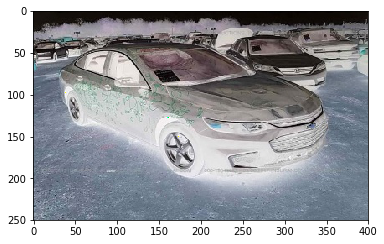

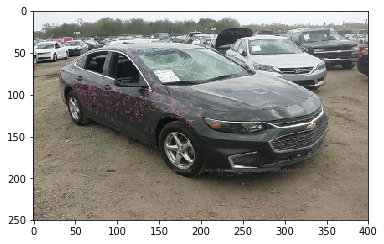

Shape of Image :
(1, 250, 400, 3)


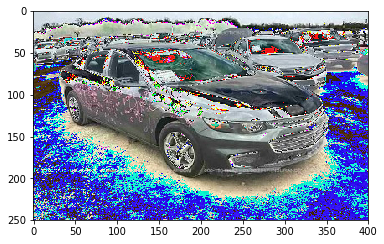

In [72]:
img_path = '../PICS/pics_erepS/DD3.jpg'
img = image.load_img(img_path, target_size=(250, 400))
img.show()
x = image.img_to_array(img)

plt.imshow(x)
plt.show()
#print(x)

y=x/255
plt.imshow(y)
plt.show()

x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print("Shape of Image :")
print(x.shape)
plt.imshow(x[0,:,:,:])
plt.show()

In [61]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=5)[0])

('Predicted:', [(u'n01644373', u'tree_frog', 0.97537428), (u'n01644900', u'tailed_frog', 0.0061486019), (u'n01641577', u'bullfrog', 0.00084080343), (u'n04458633', u'totem_pole', 0.00021266942), (u'n02226429', u'grasshopper', 0.00015054239)])


In [15]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 1, 1, 2048)